In [99]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import accuracy_score, r2_score, precision_score, precision_recall_curve
from sklearn.tree import DecisionTreeClassifier

In [100]:
df = pd.read_csv('../data/raw/healthcare-dataset-stroke-data.csv.xls')

# LIMPIEZA 

Empezamos viendo información y métricas del dataset

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [102]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


Podemos observar que tenemos varias variables binarias, algunas numericas y otras categoricas. Empecemos:

Eliminaremos los registros que no contengan información sobre el indice de masa corporal, al ser un dataset grande no nos representará ningún problema.

In [103]:
df = df.dropna(axis=0, how='any')

Preprocesaremos los datos para que funcionen en nuestro modelo:
1. Preprocesado de gender

In [104]:
df['gender'].value_counts()

gender
Female    2897
Male      2011
Other        1
Name: count, dtype: int64

In [105]:
df.drop(index=3116, inplace=True)
df.insert(2, 'is male?', np.where(df['gender'] == 'Male', 1, 0))


2. Preprocesado de ever_married

In [106]:
df.insert(7, 'has ever married?', np.where(df['ever_married'] == 'Yes', 1, 0))

3. One-hot-encoding de work_type

In [109]:
df_encoded = pd.get_dummies(df, columns=['work_type', 'Residence_type', 'smoking_status'], drop_first=True)

In [114]:
df_encoded

,id,gender,is male?,age,hypertension,heart_disease,ever_married,has ever married?,avg_glucose_level,bmi,stroke,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,Male,1,67.0,0,1,Yes,1,228.69,36.6,1,False,True,False,False,True,True,False,False
2,31112,Male,1,80.0,0,1,Yes,1,105.92,32.5,1,False,True,False,False,False,False,True,False
3,60182,Female,0,49.0,0,0,Yes,1,171.23,34.4,1,False,True,False,False,True,False,False,True
4,1665,Female,0,79.0,1,0,Yes,1,174.12,24.0,1,False,False,True,False,False,False,True,False
5,56669,Male,1,81.0,0,0,Yes,1,186.21,29.0,1,False,True,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,0,13.0,0,0,No,0,103.08,18.6,0,False,False,False,True,False,False,False,False
5106,44873,Female,0,81.0,0,0,Yes,1,125.20,40.0,0,False,False,True,False,True,False,True,False
5107,19723,Female,0,35.0,0,0,Yes,1,82.99,30.6,0,False,False,True,False,False,False,True,False
5108,37544,Male,1,51.0,0,0,Yes,1,166.29,25.6,0,False,True,False,False,False,True,False,False


# Visualizaciones

<Axes: >

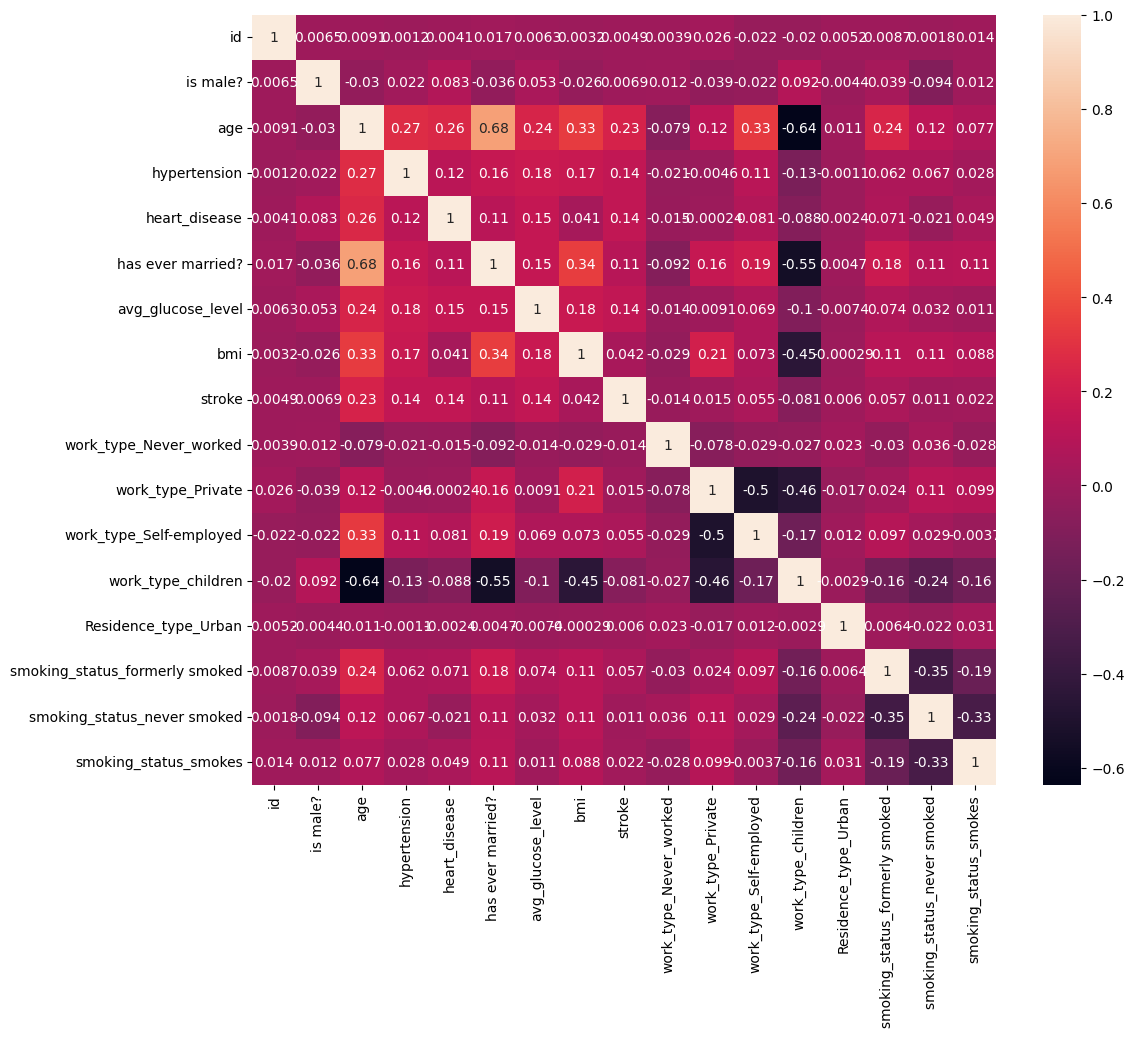

In [120]:
plt.figure(figsize=(12,10))
sns.heatmap(df_encoded.corr(numeric_only=True), annot=True)

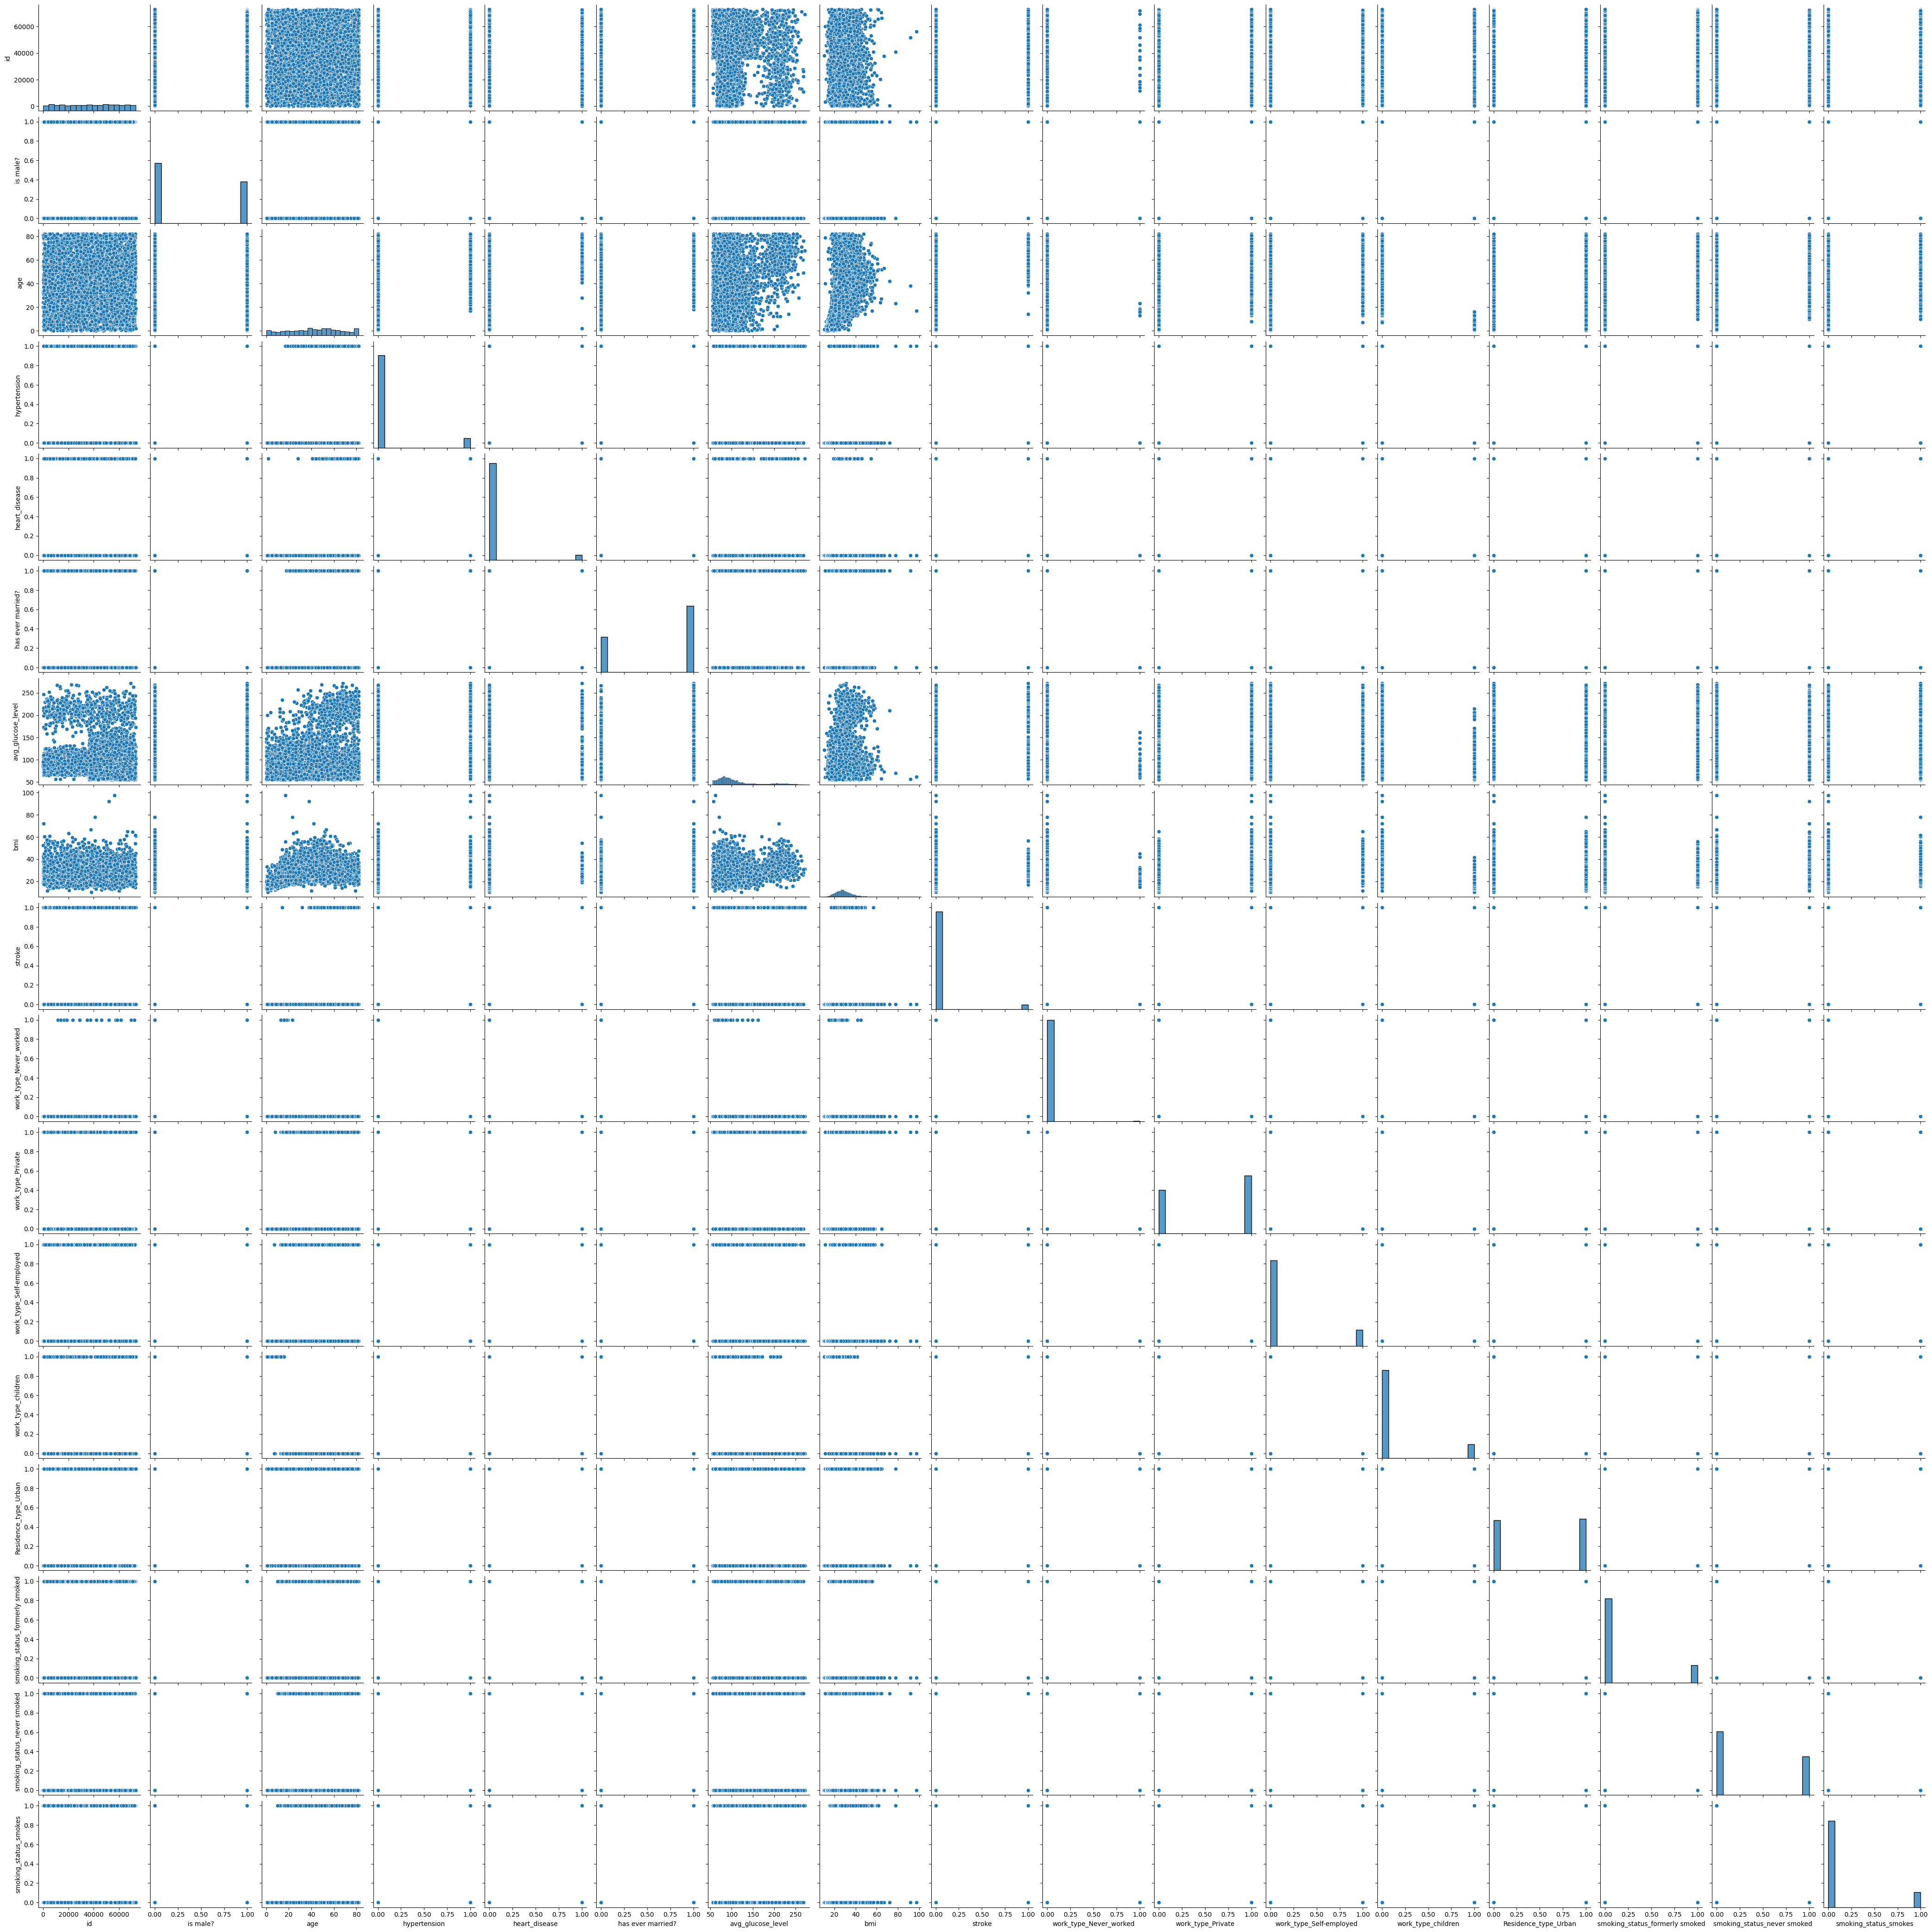

In [121]:
sns.pairplot(data=df_encoded)

In [122]:
df_encoded.to_csv('../data/processed/healthcare-dataset-processed.csv', index=False)

## Pasos del proyecto
1. ¿Podemos dar solución a un problema con datos? Elige un tema.
1. Busca y consigue los datos. Vuelta al anterior punto si nos quedamos sin ideas.
1. Define tu problema de Machine Learning: clasificación/regresión, supervisado/ no supervisado, series temporales, imágenes, texto...
1. Exploratorio: obtén todos los estadísticos y gráficos que necesites para entender bien tu dataset.
1. Limpia los datos: duplicados, missings, outliers, columnas inútiles...
1. Feature engineering: transformación y creación de nuevas variables.
1. Prueba varios modelos. Itero tanto en nuevos conjuntos de datos, corrijo overfitting,
1. Analiza los resultados mediante una métrica adecuada a tu problemática.
1. Interpreta los resultados y comprende los outputs del modelo.
1. Siguientes pasos. ¿Se podría seguir enriqueciendo el modelo con otras pruebas o con otros datos?

2. Este modelo permite predecir el nivel de experiencia de un usuario en el gimnasio. Sería útil para recomendar rutinas, ajustar niveles de intensidad o frecuencia, y orientar al usuario hacia un plan más adecuado para su nivel.